In [6]:
import sys
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
Ps = [1, 2, 4, 8]
cmd = ['mpiexec', '-n', None, sys.executable, 'n-body-mpi.py']
runtimes = []
for P in Ps:
    print("running", P, end=" ")
    cmd[2] = str(P+1)
    start = time.time()
    subprocess.call(cmd)
    stop = time.time()
    runtimes.append(stop - start)
    print(runtimes[-1])
print(runtimes)

running 1 5.229467868804932
running 2 6.794978618621826
running 4 7.470187187194824
running 8 9.632357358932495
[5.229467868804932, 6.794978618621826, 7.470187187194824, 9.632357358932495]
Wall time: 29.1 s


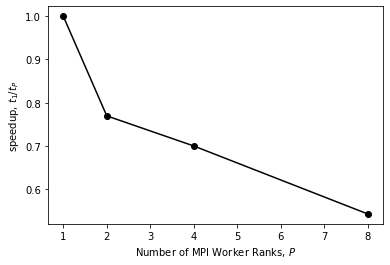

In [7]:
rts = runtimes[0] / np.array(runtimes) 
plt.plot(Ps, rts, 'ko-')
plt.xlabel('Number of MPI Worker Ranks, $P$')
plt.ylabel('speedup, $t_1/t_P$')
plt.savefig('n-body-mpi-speedup.svg')

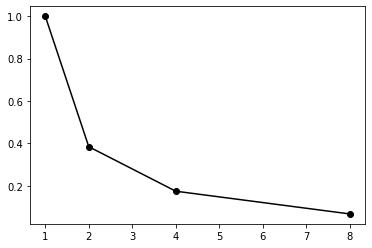

In [9]:
plt.plot(Ps, rts / Ps, 'ko-')

In [10]:
rts

array([1.        , 0.7696077 , 0.70004509, 0.54290634])

In [11]:
rts[1:] / rts[:-1]

array([0.7696077 , 0.9096129 , 0.77553053])

Text(0, 0.5, 'Relative Double Speedup, $t_P/t_{\\frac{P}{2}}$')

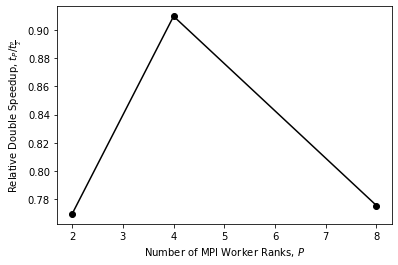

In [12]:
plt.plot(Ps[1:], rts[1:] / rts[:-1], 'ko-')
plt.xlabel('Number of MPI Worker Ranks, $P$')
plt.ylabel('Relative Double Speedup, $t_P/t_{\\frac{P}{2}}$')
#plt.savefig('n-body-mpi-double-speedup.svg')

In [13]:
runtimes[0]/4.288378953933716

1.2194509685315842